  ###      <font color=green>     <h1><center> KNN Regression Presentation - Data Mining </center></h1>  
  

## 1. Problem Definition:

#### Predicting Housing prices in King County - USA by using different features and condition  of the house.
In this code we want to train the KNN algorithm to be able to predict the price of a house given the  features. 

## 2. Data Preparation:

In [109]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
os.chdir(r'\\SRVA\Homes$\pothulas\Desktop\Ml\dataset')

In [111]:
df = pd.read_csv('kc_house_data.csv')

In [112]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [113]:
df.shape

(21613, 21)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


#### Dataset: House Sales in King County from [kaggle.com](https://www.kaggle.com/harlfoxem/housesalesprediction/data). 
* This dataset consists of **21613** observations
* Attribute Information we may use:
    1. id: a notation for a house
    2. price: Price is prediction target
    3. bedrooms: Number of Bedrooms/House
    4. bathrooms: Number of bathrooms/bedrooms
    5. sqft_living: square footage of the home
    6. sqft_lot: square footage of the lot
    7. floors: Total floors (levels) in house
    8. condition: How good the condition is ( Overall )
    9. grade: overall grade given to the housing unit, based on King County grading system
    10. sqft_above: square footage of house apart from basement
    11. zipcode: zip
    12. sqft_living15: Living room area in 2015(implies-- some renovations) 
    13. sqft_lot15: lotSize area in 2015(implies-- some renovations)

In [115]:
columns = ['date', 'waterfront','id','zipcode']
df.drop(columns, inplace=True, axis=1)

In [116]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [117]:
df.loc[df['yr_renovated'] == 0, 'yr_renovated'] = df['yr_built']

In [118]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,1987,47.6168,-122.045,1800,7503


In [119]:
df['year'] = (df['yr_renovated']+df['yr_built'])/2

In [120]:
columns = ['yr_renovated','yr_built']
df.drop(columns, inplace=True, axis=1)

In [121]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,year
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,47.5112,-122.257,1340,5650,1955.0
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,47.7210,-122.319,1690,7639,1971.0
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,47.7379,-122.233,2720,8062,1933.0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,47.5208,-122.393,1360,5000,1965.0
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,47.6168,-122.045,1800,7503,1987.0


In [122]:
df.shape

(21613, 16)

## 3. Data Exploration:

### Univariate Analysis:

In [123]:
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_living15,year
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1986.552492,1972.195577
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,685.391304,28.427567
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,399.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1490.000000,1954.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1840.000000,1976.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2360.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,6210.000000,2015.000000


### Bivariate Analysis:

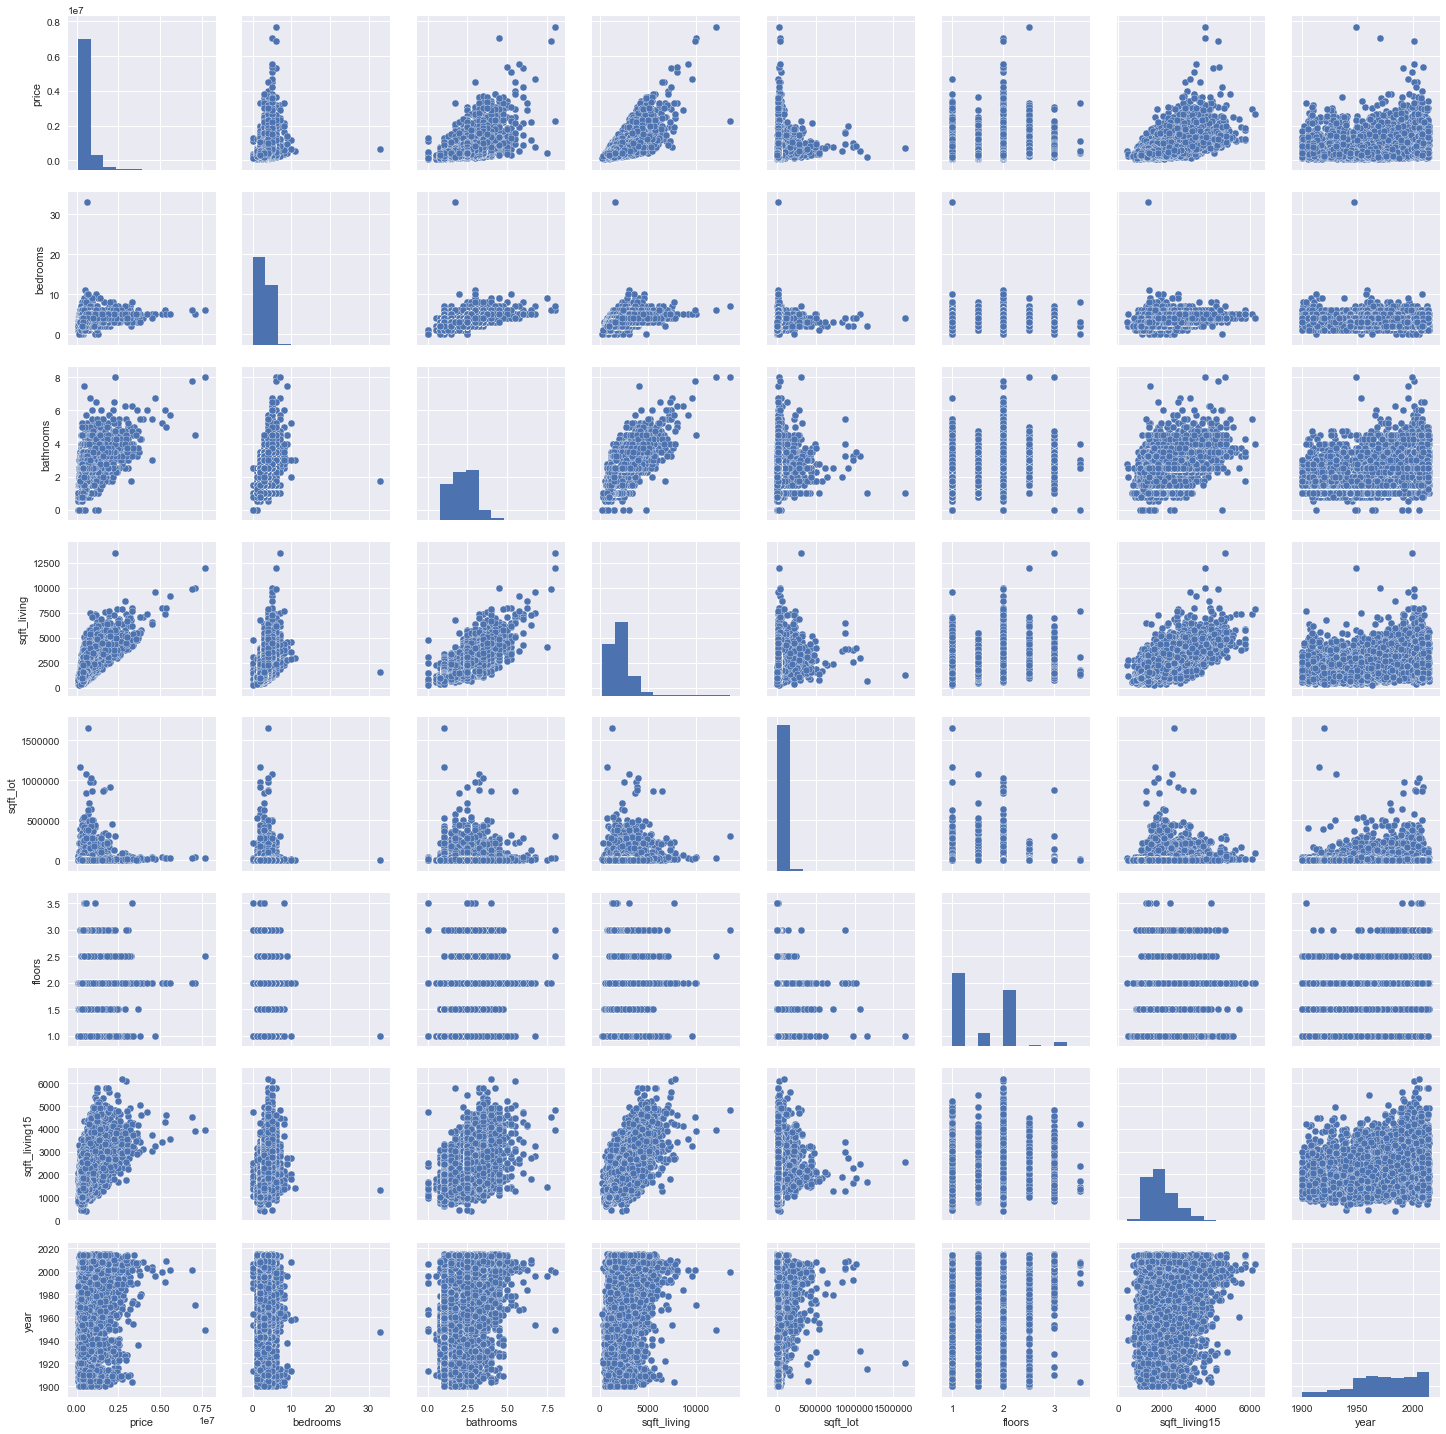

In [124]:
df1 = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_living15','year']]
sns.pairplot(df1)
plt.show()

## 4. Modeling:

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
year             21613 non-null float64
dtypes: float64(6), int64(10)
memory usage: 2.6 MB


In [127]:
X = np.array(df[['lat','long','sqft_living15','bathrooms','sqft_basement','floors','view','bedrooms','sqft_living','grade','sqft_above','condition']])
y = np.array(df1['price']) 

### Model Training & Evaluation:

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_neighbor = 10
reg = KNeighborsRegressor(n_neighbors=reg_neighbor)

reg.fit(X_train, y_train)

pred = reg.predict(X_test)


score = r2_score(y_test, pred)
print('The R2-score of the knn regressor for k = ' + str(reg_neighbor) + ' is ' + str(score))
print("Mean squared error: %.2f" % np.mean((reg.predict(X_test) - y_test) ** 2))

The R2-score of the knn regressor for k = 10 is 0.542012997802
Mean squared error: 69236969248.67


### 10 Fold Cross Validation:

In [129]:
from sklearn.cross_validation import cross_val_score
reg_cross_val = (cross_val_score(reg, X, y, cv=10, scoring='r2').mean())
print('The R2-score of the knn regressor after 10 fold cross validation for k = ' + str(reg_neighbor) + ' is ' + str(reg_cross_val))

The R2-score of the knn regressor after 10 fold cross validation for k = 10 is 0.533934300711


### Improvements for Model:

#### 1. Standardization of Values (Fairness!):

In [130]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(df.ix[:,0:16])
df_norm = pd.DataFrame(x_scaled)

# Assign the normalized value to origin dataframe
for i in range(16):
    df[df.columns[i]] = df_norm[df_norm.columns[i]]
df.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,year
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.571498,0.217608,0.161934,0.005742,0.478261
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.5,0.500000,0.206140,0.082988,0.908959,0.166113,0.222165,0.008027,0.617391
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.936143,0.237542,0.399415,0.008513,0.286957
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.586939,0.104651,0.165376,0.004996,0.565217
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.741354,0.393688,0.241094,0.007871,0.756522


#### 2. Selecting Best Features ( Curse of Dimensionality):

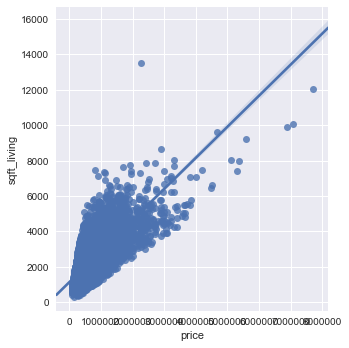

In [131]:
sns.lmplot(x="price", y="sqft_living", size=5, data=df1)
plt.show()

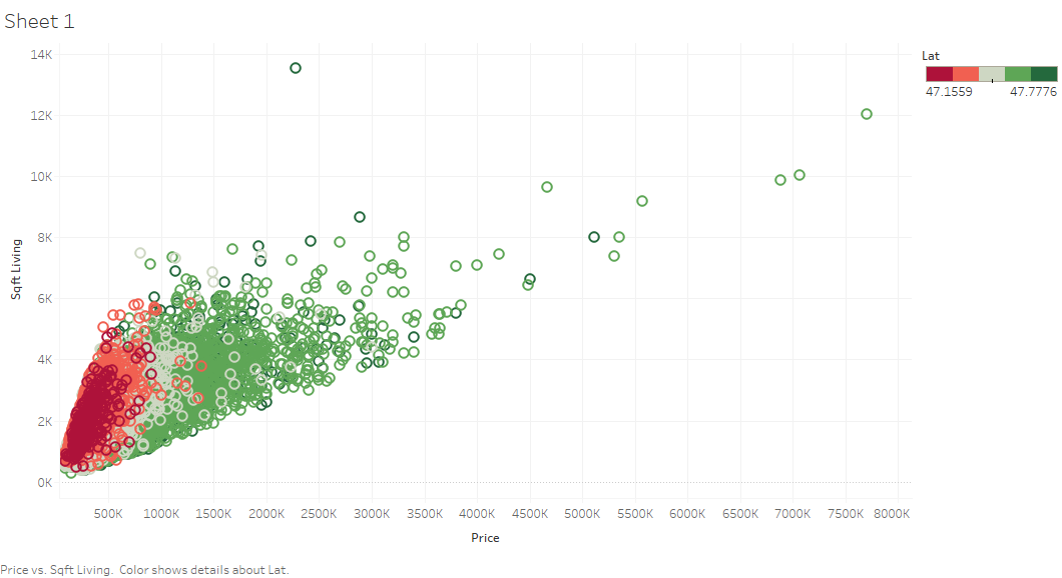

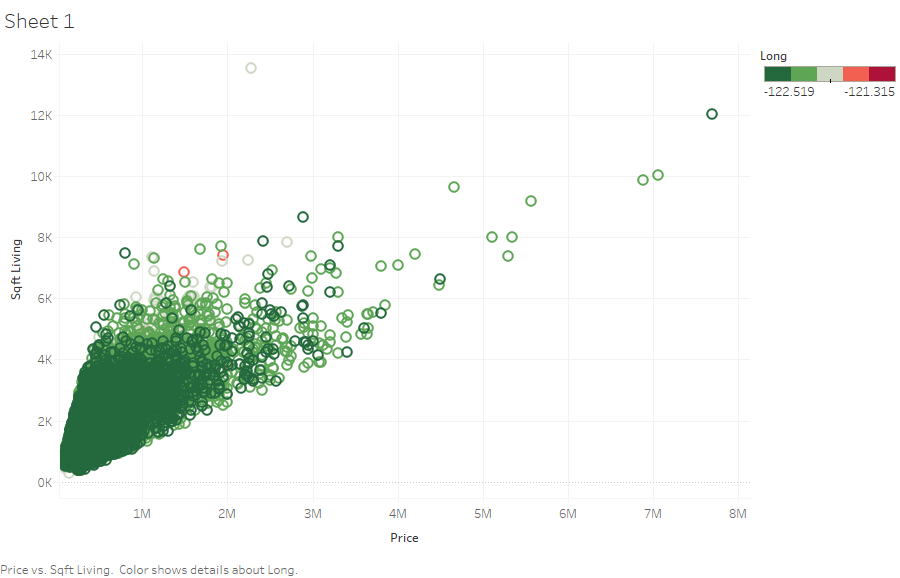

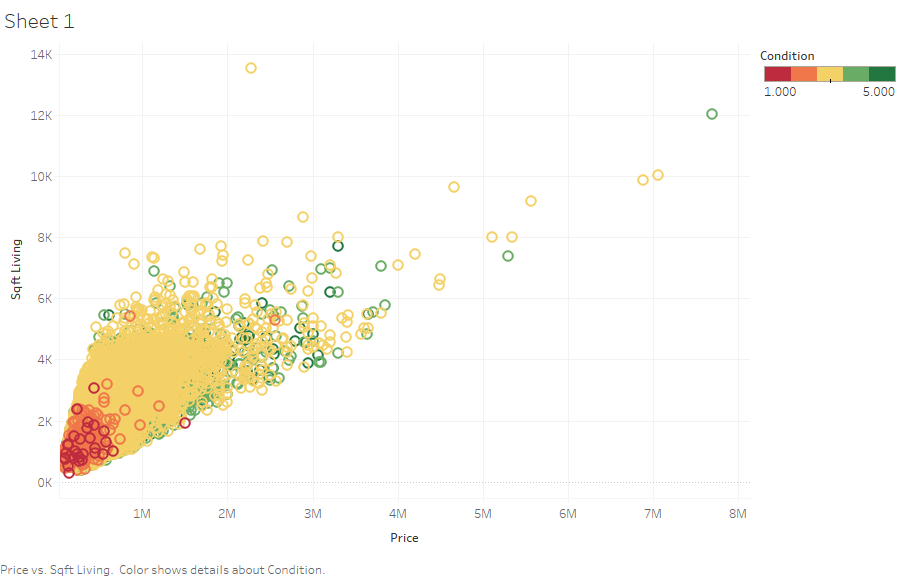

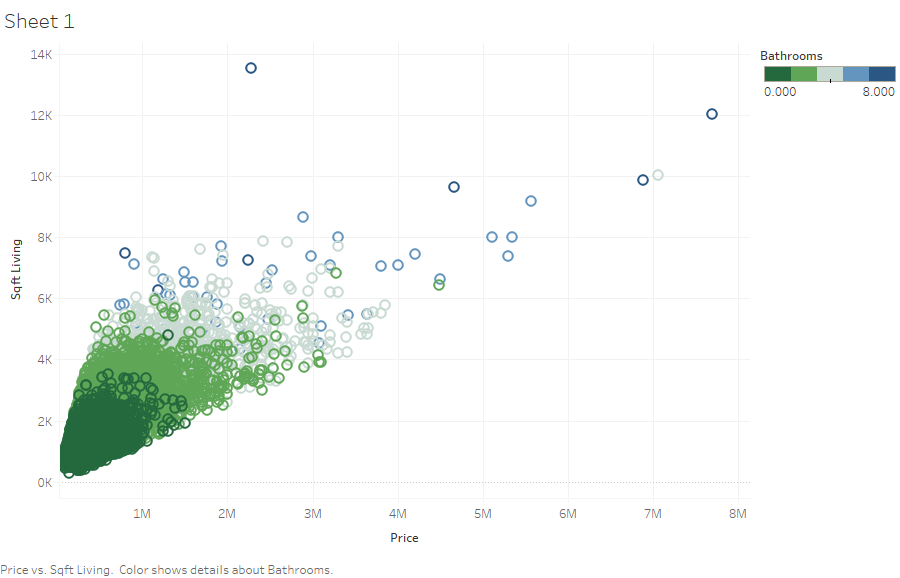

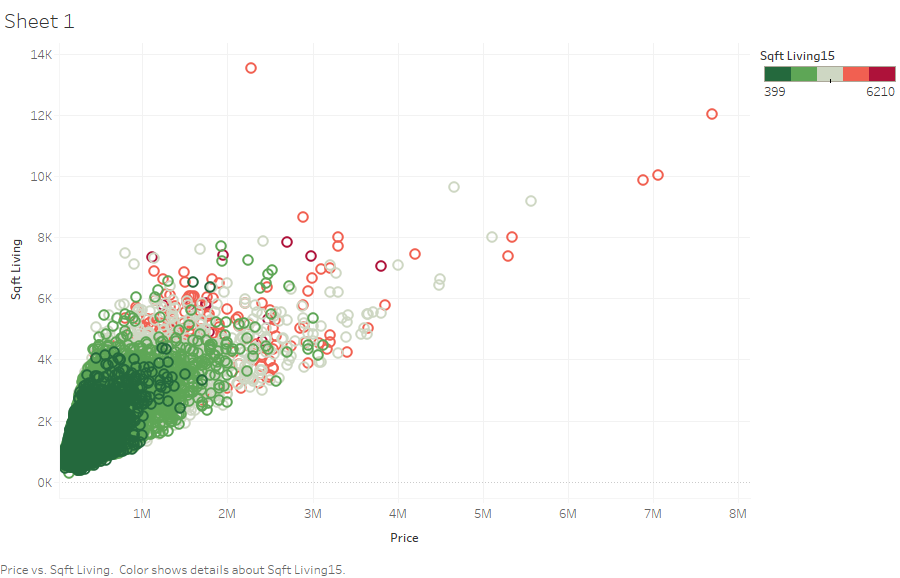

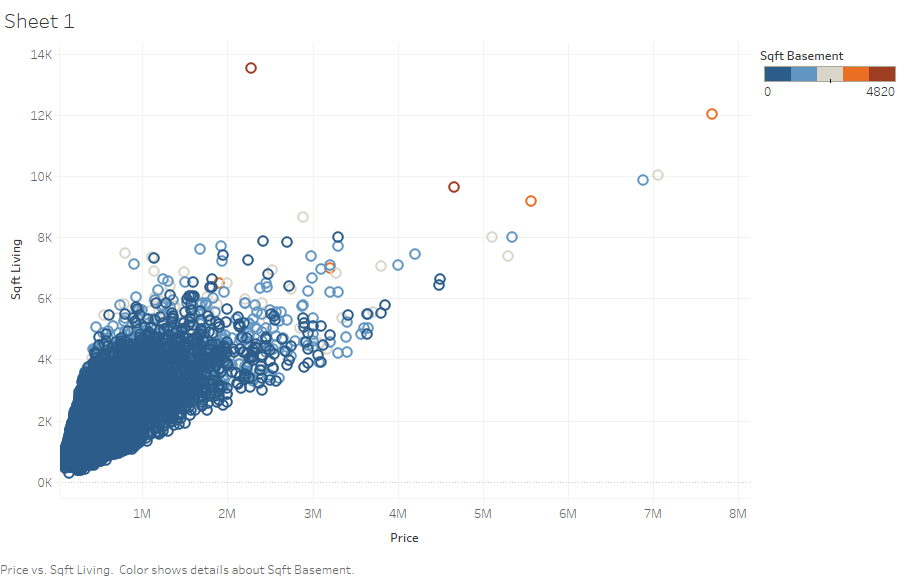

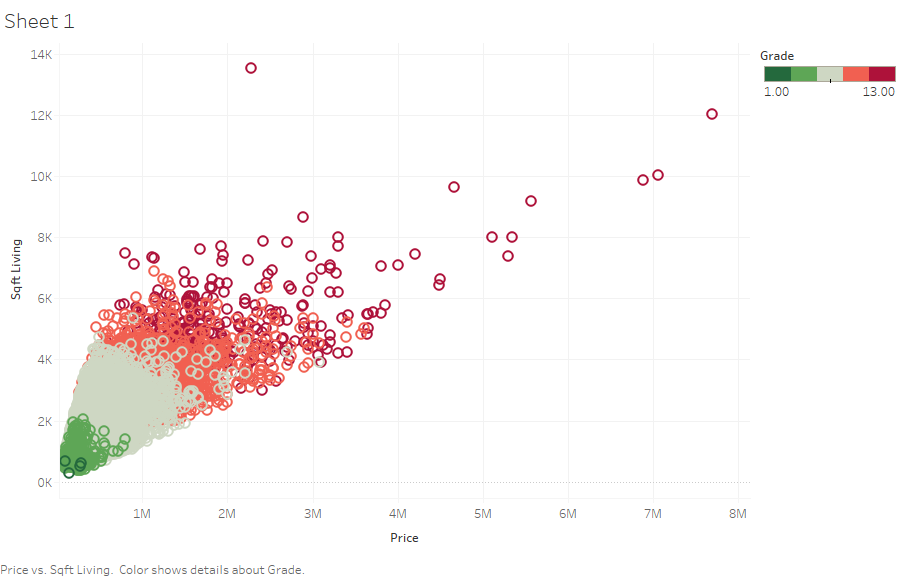

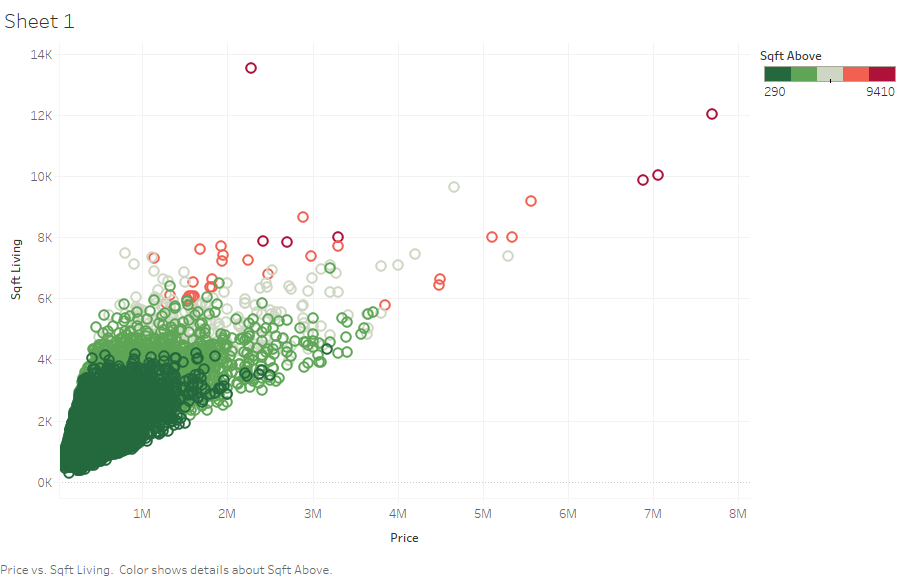

In [132]:
X = np.array(df[['lat','bathrooms','sqft_living','grade','sqft_above','condition']])
y = np.array(df1['price']) 

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_neighbor = 15
reg = KNeighborsRegressor(n_neighbors=reg_neighbor,weights='distance')

reg.fit(X_train, y_train)

pred = reg.predict(X_test)


score = r2_score(y_test, pred)
print('The R2-score of the knn regressor for k = ' + str(reg_neighbor) + ' is ' + str(score))

The R2-score of the knn regressor for k = 15 is 0.726877360238


#### 3. Choosing Optimal K value and Using Weighed Voting:

The optimal number of neighbors is 20.


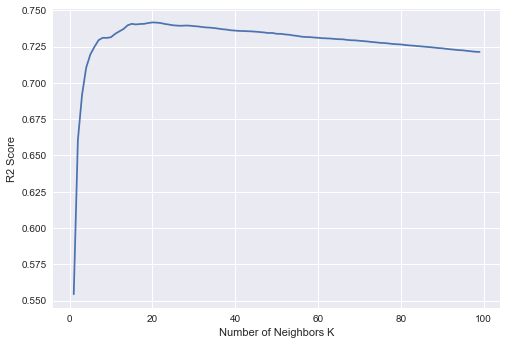

In [134]:
neighbors = range(1,100)

# empty list that will hold cv scores
r2_scores = []

# perform 10-fold cross validation
#for k in neighbors:
for k in neighbors:
    reg = KNeighborsRegressor(n_neighbors=k, weights='distance')
    scores = cross_val_score(reg, X, y, cv=10, scoring='r2')
    r2_scores.append(scores.mean())

# determining best k
optimal_k = neighbors[r2_scores.index(max(r2_scores))]
print('The optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, r2_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('R2 Score')
plt.show()

### 5. Evaluation:

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_neighbor = 20
reg = KNeighborsRegressor(n_neighbors=reg_neighbor, weights='distance')

reg.fit(X_train, y_train)

pred = reg.predict(X_test)


score = r2_score(y_test, pred)
print('The R2-score of the knn regressor for k = ' + str(reg_neighbor) + ' is ' + str(score))

The R2-score of the knn regressor for k = 20 is 0.72590819049


In [136]:
from sklearn.cross_validation import cross_val_score
reg_cross_val = (cross_val_score(reg, X, y, cv=10, scoring='r2').mean())
print('The R2-score of the knn regressor after doing Hypertuning and Improvements for k = ' + str(reg_neighbor) + ' is ' + str(reg_cross_val))

The R2-score of the knn regressor after doing Hypertuning and Improvements for k = 20 is 0.741688313406


### 6. Model Deployment:

This Model can be used by Brokerage firms or Mortagage firms where they can readily deploy it to predict the Approximate Hosuing Prices as per different features

                                              ..........................